In [2]:
%matplotlib inline
import os
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from textwrap import wrap
import ipywidgets as widgets



In [3]:
# Take in Glassdoor data and read it into pandas
glassdoor_62017 = "Resources/LPR_data-2017-06.csv"
glassdoor_72017 = "Resources/LPR_data-2017-07.csv"
glassdoor_82017 = "Resources/LPR_data-2017-08.csv"
glassdoor_92017 = "Resources/LPR_data-2017-09.csv"
glassdoor_102017 = "Resources/LPR_data-2017-10.csv"
glassdoor_112017 = "Resources/LPR_data-2017-11.csv"
glassdoor_122017 = "Resources/LPR_data-2017-12.csv"

glassdoor_12018 = "Resources/LPR_data-2018-01.csv"
glassdoor_22018 = "Resources/LPR_data-2018-02.csv"
glassdoor_32018 = "Resources/LPR_data-2018-03.csv"
glassdoor_42018 = "Resources/LPR_data-2018-04.csv"
glassdoor_52018 = "Resources/LPR_data-2018-05.csv"
glassdoor_62018 = "Resources/LPR_data-2018-06.csv"
glassdoor_72018 = "Resources/LPR_data-2018-07.csv"
glassdoor_82018 = "Resources/LPR_data-2018-08.csv"
glassdoor_92018 = "Resources/LPR_data-2018-09.csv"
glassdoor_102018 = "Resources/LPR_data-2018-10.csv"
glassdoor_112018 = "Resources/LPR_data-2018-11.csv"
glassdoor_122018 = "Resources/LPR_data-2018-12.csv"

glassdoor_12019 = "Resources/LPR_data-2019-01.csv"
glassdoor_22019 = "Resources/LPR_data-2019-02.csv"

# Created a dataframe for each csv file
glassdoor_62017_df = pd.read_csv(glassdoor_62017, encoding="utf-8")
glassdoor_72017_df = pd.read_csv(glassdoor_72017,encoding="utf-8")
glassdoor_82017_df = pd.read_csv(glassdoor_82017,encoding="utf-8")
glassdoor_92017_df = pd.read_csv(glassdoor_92017,encoding="utf-8")
glassdoor_102017_df = pd.read_csv(glassdoor_102017,encoding="utf-8")
glassdoor_112017_df = pd.read_csv(glassdoor_112017,encoding="utf-8")
glassdoor_122017_df = pd.read_csv(glassdoor_122017,encoding="utf-8")
glassdoor_12018_df = pd.read_csv(glassdoor_12018,encoding="utf-8")
glassdoor_22018_df = pd.read_csv(glassdoor_22018,encoding="utf-8")
glassdoor_32018_df = pd.read_csv(glassdoor_32018,encoding="utf-8")
glassdoor_42018_df = pd.read_csv(glassdoor_42018,encoding="utf-8")
glassdoor_52018_df = pd.read_csv(glassdoor_52018,encoding="utf-8")
glassdoor_62018_df = pd.read_csv(glassdoor_62018,encoding="utf-8")
glassdoor_72018_df = pd.read_csv(glassdoor_72018,encoding="utf-8")
glassdoor_82018_df = pd.read_csv(glassdoor_82018,encoding="utf-8")
glassdoor_92018_df = pd.read_csv(glassdoor_92018,encoding="utf-8")
glassdoor_102018_df = pd.read_csv(glassdoor_102018,encoding="utf-8")
glassdoor_112018_df = pd.read_csv(glassdoor_112018,encoding="utf-8")
glassdoor_122018_df = pd.read_csv(glassdoor_122018,encoding="utf-8")
glassdoor_12019_df = pd.read_csv(glassdoor_12019,encoding="utf-8")
glassdoor_22019_df = pd.read_csv(glassdoor_22019,encoding="utf-8")

In [4]:
# Append individual dataframes into one
glassdoor_df = glassdoor_62017_df.append([glassdoor_72017_df,glassdoor_82017_df,glassdoor_92017_df,glassdoor_102017_df,glassdoor_112017_df,glassdoor_122017_df,glassdoor_12018_df,glassdoor_22018_df,glassdoor_32018_df,glassdoor_42018_df,glassdoor_52018_df,glassdoor_62018_df,glassdoor_72018_df,glassdoor_82018_df,glassdoor_92018_df,glassdoor_102018_df,glassdoor_112018_df,glassdoor_122018_df,glassdoor_12019_df,glassdoor_22019_df])

In [5]:
# Create month and yr int columns
glassdoor_df["mnth"]=glassdoor_df["Month"].str.split('-', expand=False).str[1].astype(str).astype(int)
glassdoor_df["yr"]=glassdoor_df["Month"].str.split('-', expand=False).str[0].astype(str).astype(int)

# List of quarters and bins used to create Q1/Q2/Q3/Q4 distinction
quarters = ["1", "2", "3", "4"]
quarter_bins = [0, 3.5, 6.5, 9.5, 12.5]

# New dataframe
glassdoor_q_df = glassdoor_df

# Add column for quarter AND column for yr + (mnth / 10), "yr_mnth" (so we can sort largest to smallest and get most recent)
# Also can perform trend of salary over last year by using the max of "yr_mnth" then subtracting 1,000 to get 1 year ago
glassdoor_q_df["Quarter"] = pd.cut(glassdoor_df["mnth"], quarter_bins, labels=quarters).astype("float")
glassdoor_q_df["yr_mnth"] = (glassdoor_df["yr"] + (glassdoor_df["mnth"] / 100)).astype("float")
glassdoor_q_df["yr_quarter"] = (glassdoor_df["yr"] + (glassdoor_df["Quarter"] / 100)).astype("float")

In [6]:
#create a series of relevant data frames, separating out the "Dimension" column so that all like information is grouped
glassdoor_job_title = glassdoor_df[glassdoor_df['Dimension Type']=='Job Title']
glassdoor_job_title.reset_index(drop=True,inplace=True)


# Print out the list of cities
cities = pd.DataFrame(glassdoor_job_title["Metro"].unique())
cities

,0
0,National
1,Atlanta
2,New York City
3,Los Angeles
4,Philadelphia
5,Houston
6,Seattle
7,San Francisco
8,Chicago
9,Boston


In [7]:
#create list of job title for people to choose from
pd.set_option('display.max_rows', 100)
#create list of job titles for people to choose from
job_titles = pd.DataFrame(glassdoor_job_title["Dimension"].unique())
job_titles = job_titles.rename(columns={0:"Job Titles"})
job_titles.sort_values(["Job Titles"],inplace = True)
job_titles.reset_index(drop=True,inplace = True)
job_titles

,Job Titles
0,Accountant
1,Administrative Assistant
2,Attorney
3,Bank Teller
4,Barista
5,Bartender
6,Business Analyst
7,Business Development Manager
8,Buyer
9,Cashier


In [8]:
# Query user for city and job
city = input("What city are you interested in? ")
job = input("Looking at the job list, what job are you interested in? ")

What city are you interested in? Philadelphia
Looking at the job list, what job are you interested in? Data Analyst


In [9]:
# Based on input, provide job openings for most recent year/month as well as year ago, and calculate trend
current_city_openings_df = glassdoor_q_df
current_city_openings_df = current_city_openings_df[(current_city_openings_df['Dimension Type']=='Quick Facts') & (current_city_openings_df['Metro']==city) & (current_city_openings_df['Measure']=='Job Openings')]

curr_city_most_recent_yr_mnth = (current_city_openings_df["yr_mnth"].max()).astype("float")
curr_city_previous_yr_mnth = (curr_city_most_recent_yr_mnth - 1).astype("float")

curr_city_most_recent_yr_mnth_openings = current_city_openings_df[(current_city_openings_df['yr_mnth']==curr_city_most_recent_yr_mnth)].iloc[0,5].astype("int")
curr_city_previous_yr_mnth_openings = current_city_openings_df[(current_city_openings_df['yr_mnth']==curr_city_previous_yr_mnth)].iloc[0,5].astype("int")
curr_city_openings_per_change = round((curr_city_most_recent_yr_mnth_openings - curr_city_previous_yr_mnth_openings) / curr_city_previous_yr_mnth_openings * 100, 2)

# print(f"Fact: There are currently {curr_city_most_recent_yr_mnth_openings} job openings in {city} as compared to {curr_city_previous_yr_mnth_openings} openings a year ago, a change of {curr_city_openings_per_change}%")

C:\Users\jazzs\Anaconda3\envs\PythonData\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


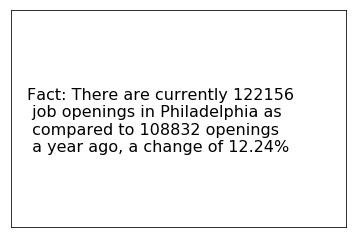

In [10]:
plt.text(0.05, 0.35, f"Fact: There are currently {curr_city_most_recent_yr_mnth_openings}\n \
job openings in {city} as\n \
compared to {curr_city_previous_yr_mnth_openings} openings \n \
a year ago, a change of {curr_city_openings_per_change}%", size=16)

plt.tick_params(axis='both', which='both', bottom='false', top='false', labelbottom='false', right='false', left='false', labelleft='false')
plt.savefig(f"output_figures/{city} Textbox #1.png", dpi=300)

In [10]:
# Create dataframe for average # of job openings in current city for each
# quarter over last several quarters
current_city_by_quarter_df = current_city_openings_df
current_city_by_quarter_df = round(current_city_by_quarter_df.groupby(['Metro', 'yr_quarter']).mean(),0)
current_city_by_quarter_df = current_city_by_quarter_df.drop(columns=["YoY", "mnth", "Quarter", "yr", "yr_mnth"])
curr_city_quart_count = len(current_city_by_quarter_df["Value"])
current_city_by_quarter_df = current_city_by_quarter_df[["Value"]][curr_city_quart_count - 6 : curr_city_quart_count+1]
current_city_by_quarter_df = current_city_by_quarter_df.reset_index()

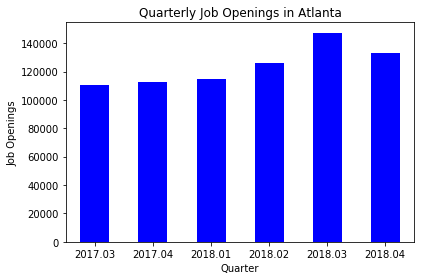

In [11]:
# Create a bar chart to display average quarterly job openings for given city
city_quart_chart = current_city_by_quarter_df["Value"].plot(kind="bar", color="b")
city_quart_chart.set_xlabel("Quarter")
city_quart_chart.set_ylabel("Job Openings")

x_axis = np.arange(6)
tick_locations = [value for value in x_axis]

plt.title(f"Quarterly Job Openings in {city}")
plt.xticks(tick_locations, current_city_by_quarter_df.iloc[:,1], rotation="horizontal")
plt.tight_layout()
plt.savefig(f"Quarterly Job Openings in {city}.png", dpi=300)
plt.show()

In [11]:
# Based on input, provide job salary info for most recent year/month as well as year ago, and calculate trend
current_city_job_df = glassdoor_q_df
current_city_job_df = current_city_job_df[(current_city_job_df['Dimension Type']=='Job Title') & (current_city_job_df['Metro']==city) & (current_city_job_df['Dimension']==job)]
current_city_job_df.head()


curr_city_most_recent_yr_mnth_job_pay = current_city_job_df[(current_city_job_df['yr_mnth']==curr_city_most_recent_yr_mnth)].iloc[0,5].astype("int")

curr_city_previous_yr_mnth_job_pay = current_city_job_df[(current_city_job_df['yr_mnth']==curr_city_previous_yr_mnth)].iloc[0,5].astype("int")

curr_city_job_pay_per_change = round((curr_city_most_recent_yr_mnth_job_pay - curr_city_previous_yr_mnth_job_pay) / curr_city_previous_yr_mnth_job_pay * 100, 2)

In [12]:
# Based on input, provide MEDIAN job salary info for OVERALL city for most recent year/month as well as year ago, and calculate trend
# This is used for the person to compare to the specific job position's pay they searched for above
current_city_avg_salary_df = glassdoor_q_df
current_city_avg_salary_df = current_city_avg_salary_df[(current_city_avg_salary_df['Dimension Type']=='Timeseries') & (current_city_avg_salary_df['Metro']==city)]
current_city_avg_salary_df.head()


curr_city_most_recent_yr_mnth_avg_salary = current_city_avg_salary_df[(current_city_avg_salary_df['yr_mnth']==curr_city_most_recent_yr_mnth)].iloc[0,5].astype("int")

curr_city_previous_yr_mnth_avg_salary = current_city_avg_salary_df[(current_city_avg_salary_df['yr_mnth']==curr_city_previous_yr_mnth)].iloc[0,5].astype("int")

curr_city_avg_salary_per_change = round((curr_city_most_recent_yr_mnth_avg_salary - curr_city_previous_yr_mnth_avg_salary) / curr_city_previous_yr_mnth_avg_salary * 100, 2)

job_searched_vs_city_median = (curr_city_most_recent_yr_mnth_job_pay / curr_city_most_recent_yr_mnth_avg_salary * 100).astype("int")

In [13]:
# Based on input, provide job salary info for most recent year/month as well as year ago, and calculate trend
total_us_job_df = glassdoor_q_df
total_us_job_df = total_us_job_df[(total_us_job_df['Dimension Type']=='Job Title') & (total_us_job_df['Metro']=="National") & (total_us_job_df['Dimension']==job)]
total_us_job_df.head()


total_us_most_recent_yr_mnth_job_pay = total_us_job_df[(total_us_job_df['yr_mnth']==curr_city_most_recent_yr_mnth)].iloc[0,5].astype("int")

total_us_previous_yr_mnth_job_pay = total_us_job_df[(total_us_job_df['yr_mnth']==curr_city_previous_yr_mnth)].iloc[0,5].astype("int")

total_us_job_pay_per_change = round((total_us_most_recent_yr_mnth_job_pay - total_us_previous_yr_mnth_job_pay) / total_us_previous_yr_mnth_job_pay * 100, 2)

# print("---Analysis---")
# print("")
# print(f"{job}s in {city} on average earn ${curr_city_most_recent_yr_mnth_job_pay} as compared to ${curr_city_previous_yr_mnth_job_pay} a year ago, a change of {curr_city_job_pay_per_change}%")
# print("")
# print(f"The average salary in {city} is ${curr_city_most_recent_yr_mnth_avg_salary} which, compared to a year ago, is a change of {curr_city_avg_salary_per_change}%")
# print("")
# print(f"The average {job} salary in the United States is ${total_us_most_recent_yr_mnth_job_pay} which, compared to a year ago, is a change of {total_us_job_pay_per_change}%")
# print("")
# print(f"{city} {job}s earn {job_searched_vs_city_median}% of the average salary in {city}")

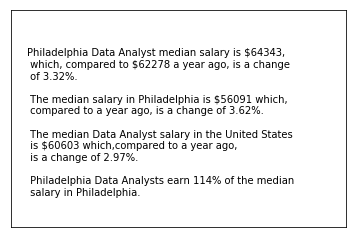

In [14]:
plt.text(0.05, 0.15, f"{city} {job} median salary is ${curr_city_most_recent_yr_mnth_job_pay},\n \
which, compared to ${curr_city_previous_yr_mnth_job_pay} a year ago, is a change\n \
of {curr_city_job_pay_per_change}%. \n \
\n \
The median salary in {city} is ${curr_city_most_recent_yr_mnth_avg_salary} which,\n \
compared to a year ago, is a change of {curr_city_avg_salary_per_change}%. \n \
\n \
The median {job} salary in the United States\n \
is ${total_us_most_recent_yr_mnth_job_pay} which,compared to a year ago,\n \
is a change of {total_us_job_pay_per_change}%. \n \
\n \
{city} {job}s earn {job_searched_vs_city_median}% of the median\n \
salary in {city}.", size=10)

plt.tick_params(axis='both', which='both', bottom='false', top='false', labelbottom='false', right='false', left='false', labelleft='false')
plt.savefig(f"{city} Textbox #2.png", dpi=300)

In [16]:
# Create dataframe for average salary FOR GIVEN JOB in current city for each
# quarter over last several quarters

current_city_job_pay_by_quarter_df = current_city_job_df
current_city_job_pay_by_quarter_df = round(current_city_job_pay_by_quarter_df.groupby(['yr_quarter']).mean()["Value"],0).astype("int")

In [17]:
# Create dataframe for MEDIAN salary IN CURRENT CITY for each
# quarter over last several quarters

current_city_med_pay_by_quarter_df = current_city_avg_salary_df
current_city_med_pay_by_quarter_df = round(current_city_med_pay_by_quarter_df.groupby(['yr_quarter']).mean()["Value"],0).astype("int")

In [18]:
# Create dataframe for SPECIFIC JOB salary TOTAL US for each
# quarter over last several quarters

total_us_job_pay_by_quarter_df = total_us_job_df
total_us_job_pay_by_quarter_df = round(total_us_job_pay_by_quarter_df.groupby(['yr_quarter']).mean()["Value"],0).astype("int")

In [19]:
# Join last 3 groupby dataframes into one, create line graph to compare three groups over time
merged = pd.DataFrame({f"Avg {city} {job} Salary": current_city_job_pay_by_quarter_df,
                       f"Median {city} Salary": current_city_med_pay_by_quarter_df,
                       f"Avg Total US {job} Salary": total_us_job_pay_by_quarter_df
                      })
merged = merged.reset_index()

count = merged["yr_quarter"].count()
combined_last_six_quarters = merged
combined_last_six_quarters = combined_last_six_quarters[count - 6 : count+1]
combined_last_six_quarters = combined_last_six_quarters.set_index("yr_quarter")

In [20]:
city_job_to_plot = combined_last_six_quarters.iloc[:, 0]
city_med_to_plot = combined_last_six_quarters.iloc[:, 1]
us_job_to_plot = combined_last_six_quarters.iloc[:, 2]

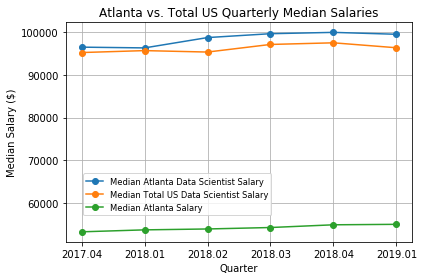

In [21]:
# Create a line chart to display avg salaries over last 6 quarters
fig, ax = plt.subplots()

x_axis = np.arange(6)

ax.errorbar(x_axis, city_job_to_plot, label=f"Median {city} {job} Salary", marker="o")
ax.legend()

ax.errorbar(x_axis, us_job_to_plot, label=f"Median Total US {job} Salary", marker="o")
ax.legend()

ax.errorbar(x_axis, city_med_to_plot, label=f"Median {city} Salary", marker="o")
ax.legend()



ax.set_title(f"{city} vs. Total US Quarterly Median Salaries")
ax.set_xlabel("Quarter")
ax.set_ylabel("Median Salary ($)")
tick_locations = [value for value in x_axis]
ax.legend(loc=[0.05, 0.12], fontsize="small", fancybox=True)

plt.xticks(tick_locations, combined_last_six_quarters.index)

plt.grid()
plt.tight_layout()
plt.savefig(f"{city} vs. Total US Quarterly Median Salaries.png", dpi=300)

In [15]:
industry_pay_df = glassdoor_q_df
industry_pay_df = industry_pay_df[(industry_pay_df['Dimension Type']=='Industry') & (industry_pay_df['Metro']==city) & (industry_pay_df['yr_mnth']==curr_city_most_recent_yr_mnth)]

top_industry_pay_df = industry_pay_df.nlargest(5, "Value", keep='first')
top_industry_pay_df = round(top_industry_pay_df.groupby(['Dimension']).mean()["Value"],0).astype("int")
top_industry_pay_df = pd.DataFrame({"Top 5 Industries" : top_industry_pay_df})
top_industry_pay_df = top_industry_pay_df.reset_index()
top_industry_pay_df = top_industry_pay_df.sort_values(by=['Top 5 Industries'], ascending=False)


bottom_industry_pay_df = industry_pay_df.nsmallest(5, "Value", keep='first')
bottom_industry_pay_df = round(bottom_industry_pay_df.groupby(['Dimension']).mean()["Value"],0).astype("int")
bottom_industry_pay_df = pd.DataFrame({"Bottom 5 Industries" : bottom_industry_pay_df})
bottom_industry_pay_df = bottom_industry_pay_df.reset_index()
bottom_industry_pay_df = bottom_industry_pay_df.sort_values(by=['Bottom 5 Industries'], ascending=True)

In [16]:
# Creates list of labels for top 5 industries that wrap text for every 10 characters to fit
top_ind_labels = top_industry_pay_df["Dimension"]
top_ind_labels = [ '\n'.join(wrap(l, 10)) for l in top_ind_labels ]

In [17]:
# Creates list of labels for bottom 5 industries that wrap text for every 10 characters to fit
bottom_ind_labels = bottom_industry_pay_df["Dimension"]
bottom_ind_labels = [ '\n'.join(wrap(l, 10)) for l in bottom_ind_labels ]

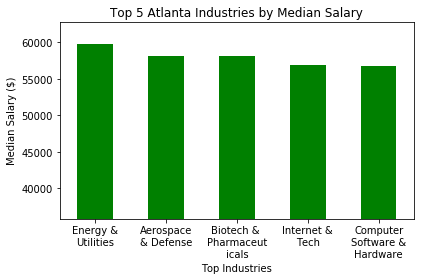

In [25]:
# Create a bar chart to display top 5 industries by avg salary for given city
city_top_industry_chart = top_industry_pay_df["Top 5 Industries"].plot(kind="bar", color="g")
city_top_industry_chart.set_xlabel("Top Industries")
city_top_industry_chart.set_ylabel("Median Salary ($)")

x_axis = np.arange(5)
tick_locations = [value for value in x_axis]

plt.title(f"Top 5 {city} Industries by Median Salary")
plt.xticks(tick_locations, top_ind_labels, rotation="horizontal")

plt.ylim(max(top_industry_pay_df["Top 5 Industries"]) * 0.6, max(top_industry_pay_df["Top 5 Industries"]) * 1.05)
plt.tight_layout()
plt.savefig(f"Top 5 {city} Industries by Median Salary.png", dpi=300)
plt.show()

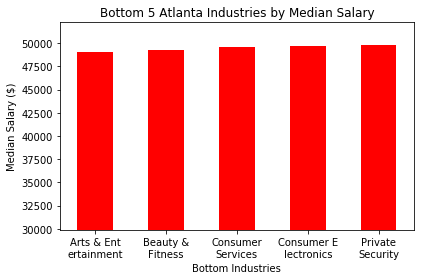

In [26]:
# Create a bar chart to display bottom 5 industries by avg salary for given city
city_bottom_industry_chart = bottom_industry_pay_df["Bottom 5 Industries"].plot(kind="bar", color="r")
city_bottom_industry_chart.set_xlabel("Bottom Industries")
city_bottom_industry_chart.set_ylabel("Median Salary ($)")

x_axis = np.arange(5)
tick_locations = [value for value in x_axis]

plt.title(f"Bottom 5 {city} Industries by Median Salary")
plt.xticks(tick_locations, bottom_ind_labels, rotation="horizontal")

plt.ylim(max(bottom_industry_pay_df["Bottom 5 Industries"]) * 0.6, max(bottom_industry_pay_df["Bottom 5 Industries"]) * 1.05)
plt.tight_layout()
plt.savefig(f"Bottom 5 {city} Industries by Median Salary.png", dpi=300)
plt.show()

In [27]:
# Calculate salary trend for every job in given city
# Use to sort and find top/bottom 5 jobs in given city by increase/decrease of salary
current_city_job_growth_df = glassdoor_q_df

current_city_job_df = current_city_job_growth_df[(current_city_job_growth_df['yr_mnth']==curr_city_most_recent_yr_mnth) & (current_city_job_growth_df['Dimension Type']=='Job Title') & (current_city_job_growth_df['Metro']==city)]
current_city_job_df = current_city_job_df.groupby(['Dimension']).mean()["Value"].astype("int")
current_city_job_df = pd.concat([current_city_job_df], axis=1)


previous_city_job_df = current_city_job_growth_df[(current_city_job_growth_df['yr_mnth']==curr_city_previous_yr_mnth) & (current_city_job_growth_df['Dimension Type']=='Job Title') & (current_city_job_growth_df['Metro']==city)]
previous_city_job_df = previous_city_job_df.groupby(['Dimension']).mean()["Value"].astype("int")
previous_city_job_df = pd.concat([previous_city_job_df], axis=1)

merged_curr_prev_salary = pd.merge(previous_city_job_df, current_city_job_df, how="left", on=["Dimension"])
merged_curr_prev_salary["% Change"] = (merged_curr_prev_salary["Value_y"] - merged_curr_prev_salary["Value_x"]) / merged_curr_prev_salary["Value_x"] * 100

bottom_curr_prev_salary = merged_curr_prev_salary.nsmallest(5, "% Change", keep='first')
bottom_curr_prev_salary = bottom_curr_prev_salary.reset_index()
bottom_curr_prev_salary = bottom_curr_prev_salary.sort_values(by=['% Change'], ascending=True)
# bottom_curr_prev_salary

top_curr_prev_salary = merged_curr_prev_salary.nlargest(5, "% Change", keep='first')
top_curr_prev_salary = top_curr_prev_salary.reset_index()
top_curr_prev_salary = top_curr_prev_salary.sort_values(by=['% Change'], ascending=False)

In [28]:
# Creates list of labels for top 5 industries that wrap text for every 10 characters to fit
top_sal_growth_labels = top_curr_prev_salary["Dimension"]
top_sal_growth_labels = [ '\n'.join(wrap(l, 10)) for l in top_sal_growth_labels ]

In [29]:
# Creates list of labels for bottom 5 industries that wrap text for every 10 characters to fit
bottom_sal_growth_labels = bottom_curr_prev_salary["Dimension"]
bottom_sal_growth_labels = [ '\n'.join(wrap(l, 10)) for l in bottom_sal_growth_labels ]

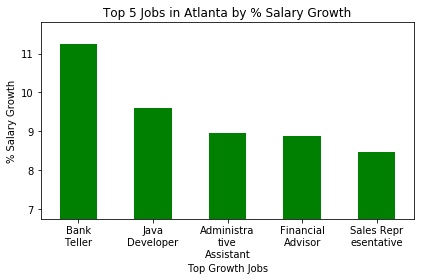

In [30]:
# Create a bar chart to display top 5 jobs by % salary increase for given city
job_sal_growth_chart = top_curr_prev_salary["% Change"].plot(kind="bar", color="g")
job_sal_growth_chart.set_xlabel("Top Growth Jobs")
job_sal_growth_chart.set_ylabel("% Salary Growth")

x_axis = np.arange(5)
tick_locations = [value for value in x_axis]

plt.title(f"Top 5 Jobs in {city} by % Salary Growth")
plt.xticks(tick_locations, top_sal_growth_labels, rotation="horizontal")

plt.ylim(max(top_curr_prev_salary["% Change"]) * 0.6, max(top_curr_prev_salary["% Change"]) * 1.05)
plt.tight_layout()
plt.savefig(f"Top 5 Jobs in {city} by % Salary Growth.png", dpi=300)
plt.show()

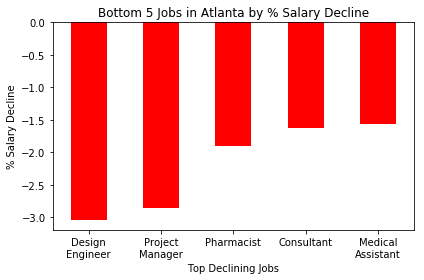

In [31]:
# Create a bar chart to display bottom 5 jobs by % salary decrease for given city
job_sal_decline_chart = bottom_curr_prev_salary["% Change"].plot(kind="bar", color="r")
job_sal_decline_chart.set_xlabel("Top Declining Jobs")
job_sal_decline_chart.set_ylabel("% Salary Decline")

x_axis = np.arange(5)
tick_locations = [value for value in x_axis]

plt.title(f"Bottom 5 Jobs in {city} by % Salary Decline")
plt.xticks(tick_locations, bottom_sal_growth_labels, rotation="horizontal")

# plt.ylim(max(bottom_curr_prev_salary["% Change"]) * 0.6, max(bottom_curr_prev_salary["% Change"]) * 1.05)
plt.tight_layout()
plt.savefig(f"Bottom 5 Jobs in {city} by % Salary Decline.png", dpi=300)
plt.show()

In [32]:
company_size_df = glassdoor_q_df
company_size_df = company_size_df[(company_size_df['Dimension Type']=='Company Size') & (company_size_df['Metro']==city) & (company_size_df['yr_mnth']==curr_city_most_recent_yr_mnth)]
company_size_df = round(company_size_df.groupby(['Dimension']).mean()["Value"],0).astype("int")
company_size_df = pd.DataFrame({"Company Size" : company_size_df})

In [33]:
company_size_order_df = pd.DataFrame({
    "Dimension" : ["<51", "51-200", "201-500", "501-1000", "1001-5000", "5000+"],
    "Order" : [1, 2, 3, 4, 5, 6]
})
company_size_order_df = company_size_order_df.set_index("Dimension")

In [34]:
merged_company_size = pd.merge(company_size_df, company_size_order_df, how="left", on=["Dimension"])
merged_company_size = merged_company_size.reset_index()
merged_company_size = merged_company_size.set_index("Order")
merged_company_size = merged_company_size.sort_values(by=['Order'], ascending=True)

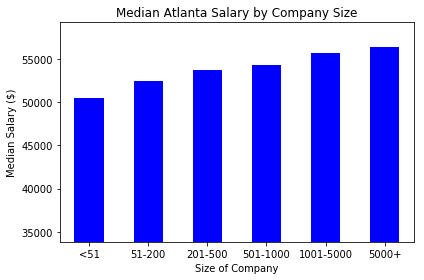

In [35]:
# Create a bar chart to display average salary by company size for given city
city_comp_size_chart = merged_company_size["Company Size"].plot(kind="bar", color="b")
city_comp_size_chart.set_xlabel("Size of Company")
city_comp_size_chart.set_ylabel("Median Salary ($)")

x_axis = np.arange(6)
tick_locations = [value for value in x_axis]

plt.title(f"Median {city} Salary by Company Size")
plt.xticks(tick_locations, merged_company_size.iloc[:,0], rotation="horizontal")

plt.ylim(max(merged_company_size["Company Size"]) * 0.6, max(merged_company_size["Company Size"]) * 1.05)
plt.tight_layout()
plt.savefig(f"Median {city} Salary by Company Size.png", dpi=300)
plt.show()